### Descritores de Região

Utilizando a imagem anexa:
• Binarize a imagem.
• Crie rótulos para cada componente conexo.

• Crie imagens com cada componente conexo, padronizando-as pelas di-
mensões da maior.

• Preencha cada componente conexa: não pode haver buracos, somente
silhuetas.

• Calcule, para cada componente conexo, os seguintes descritores de re-
gião:

– Área,

– Perímetro,

– Compacidade,

– Quociente Isoperimétrico,

– Eixo maior e eixo menor,

– Excentricidade,

– Convexidade,

– Retangularidade, e

– Solidez.

Componha, para cada componente conexo, 2 vetores:

– O primeiro vetor (vd) deve conter todos os descritores acima; e


– O segundo vetor (va) deve conter somente os descritores adimensionais.


Utilize os vetores vd para criar uma matriz de distâncias (Ad) entre as componentes conexas. Por exemplo, se houver n componentes conexas, a matriz deverá ser n × n.


• Utilize os vetores va para criar uma matriz de distâncias (Ad) entre as componentes conexas.


• Utilize as matrizes para agrupar (clustering) as componentes conexas semelhantes.

#### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.morphology import convex_hull_image 
from scipy.ndimage import binary_fill_holes

#### Função para Binarização da Imagem

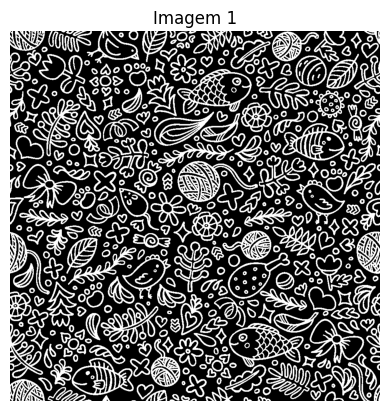

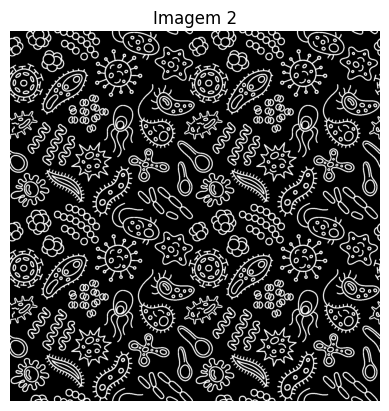

In [7]:
def carregar_e_binarizar_imagem(caminho, threshold=0.5):
    imagem = io.imread(caminho, as_gray=True)
    imagem_binaria = (imagem < threshold).astype(bool)  # Binarizar (inverter para 0=fundo, 1=frente)
    return imagem_binaria

# Função para exibir a imagem em cada etapa
def mostrar_imagem(img, titulo="Imagem"):
    plt.imshow(img, cmap="gray")
    plt.title(titulo)
    plt.axis("off")
    plt.show()

imagem_binaria_1 = carregar_e_binarizar_imagem("imagem_1.jpg")
imagem_binaria_2 = carregar_e_binarizar_imagem("imagem_2.jpg")

# Mostrar a imagem original
mostrar_imagem(imagem_binaria_1, "Imagem 1")

mostrar_imagem(imagem_binaria_2, "Imagem 2")

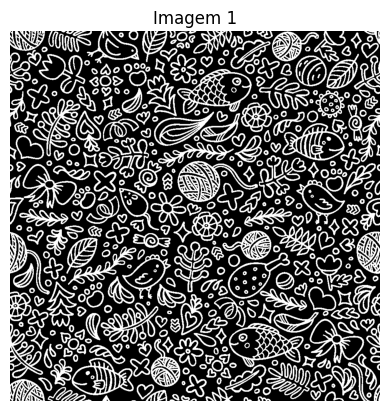

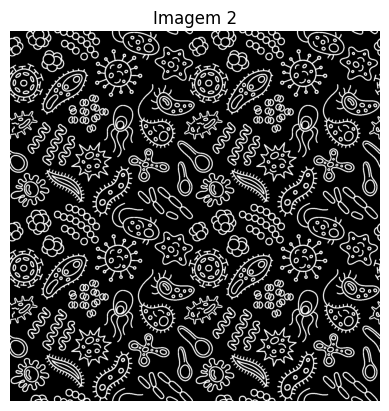

In [32]:
def carregar_e_binarizar_imagem(caminho, threshold=0.5):
    imagem = io.imread(caminho, as_gray=True)
    imagem_binaria = (imagem < threshold).astype(bool)  # Binarizar (inverter para 0=fundo, 1=frente)
    return imagem_binaria

# Função para exibir a imagem em cada etapa
def mostrar_imagem(img, titulo="Imagem"):
    plt.imshow(img, cmap="gray")
    plt.title(titulo)
    plt.axis("off")
    plt.show()

imagem_binaria_1 = carregar_e_binarizar_imagem("imagem_1.jpg")
imagem_binaria_2 = carregar_e_binarizar_imagem("imagem_2.jpg")

# Mostrar a imagem original
mostrar_imagem(imagem_binaria_1, "Imagem 1")

mostrar_imagem(imagem_binaria_2, "Imagem 2")



#### Rotulação dos Componentes Conexos

In [33]:
def label_components(binary_image):
    labeled_image = label(binary_image, connectivity=2)
    return labeled_image

#### Criar Imagens de Componentes Conexos Padronizadas

In [34]:
def extract_components(labeled_image):
    components = []
    max_height = 0
    max_width = 0

    # Obter dimensões do maior componente
    for region in regionprops(labeled_image):
        minr, minc, maxr, maxc = region.bbox
        height = maxr - minr
        width = maxc - minc
        max_height = max(max_height, height)
        max_width = max(max_width, width)

    # Criar componentes com dimensões padronizadas
    for region in regionprops(labeled_image):
        minr, minc, maxr, maxc = region.bbox
        component = np.zeros((max_height, max_width), dtype=bool)
        component[: (maxr - minr), : (maxc - minc)] = labeled_image[minr:maxr, minc:maxc] == region.label
        components.append(component)

    return components


#### Preencher os buracos de cada componente

In [35]:
def fill_holes(components):
    return [binary_fill_holes(component) for component in components]

#### Calcular os Descritores de Região

In [36]:
def calculate_descriptors(components):
    descriptors = []
    for component in components:
        region = regionprops(component.astype(int))[0]

        area = region.area
        perimeter = region.perimeter
        compactness = perimeter ** 2 / (4 * np.pi * area)
        isoperimetric_quotient = (4 * np.pi * area) / (perimeter ** 2)
        major_axis = region.major_axis_length
        minor_axis = region.minor_axis_length
        eccentricity = region.eccentricity
        convex_image = convex_hull_image(component)
        convex_area = np.sum(convex_image)
        convexity = convex_area / area
        rectangularity = area / (major_axis * minor_axis)
        solidity = area / convex_area

        descriptors.append({
            "Área": area,
            "Perímetro": perimeter,
            "Compacidade": compactness,
            "Quociente Isoperimétrico": isoperimetric_quotient,
            "Eixo Maior": major_axis,
            "Eixo Menor": minor_axis,
            "Excentricidade": eccentricity,
            "Convexidade": convexity,
            "Retangularidade": rectangularity,
            "Solidez": solidity
        })

    return descriptors


#### Exibir os resultados

In [43]:
def display_results(image, binary, labeled_image, components, descriptors):
    plt.figure(figsize=(12, 8))

    # Imagem original
    plt.subplot(5, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Imagem Original")
    plt.axis("off")

    # Imagem binarizada
    plt.subplot(5, 3, 2)
    plt.imshow(binary, cmap="gray")
    plt.title("Imagem Binarizada")
    plt.axis("off")

    # Imagem rotulada
    plt.subplot(5, 3, 3)
    plt.imshow(labeled_image, cmap="nipy_spectral")
    plt.title("Componentes Conexos")
    plt.axis("off")

    # Mostrar componentes
    for i, component in enumerate(components[:12]):  # Mostrar os 3 primeiros componentes
        plt.subplot(5, 3, 4 + i)
        plt.imshow(component, cmap="gray")
        plt.title(f"Componente {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Mostrar descritores
    for i, desc in enumerate(descriptors):
        print(f"Componente {i+1}:")
        for key, value in desc.items():
            print(f"  {key}: {value}")
        print()


#### Executar o processo completo

C:\Users\luanf\AppData\Local\Temp\ipykernel_5264\2210700636.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  rectangularity = area / (major_axis * minor_axis)
C:\Users\luanf\AppData\Local\Temp\ipykernel_5264\2210700636.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  isoperimetric_quotient = (4 * np.pi * area) / (perimeter ** 2)


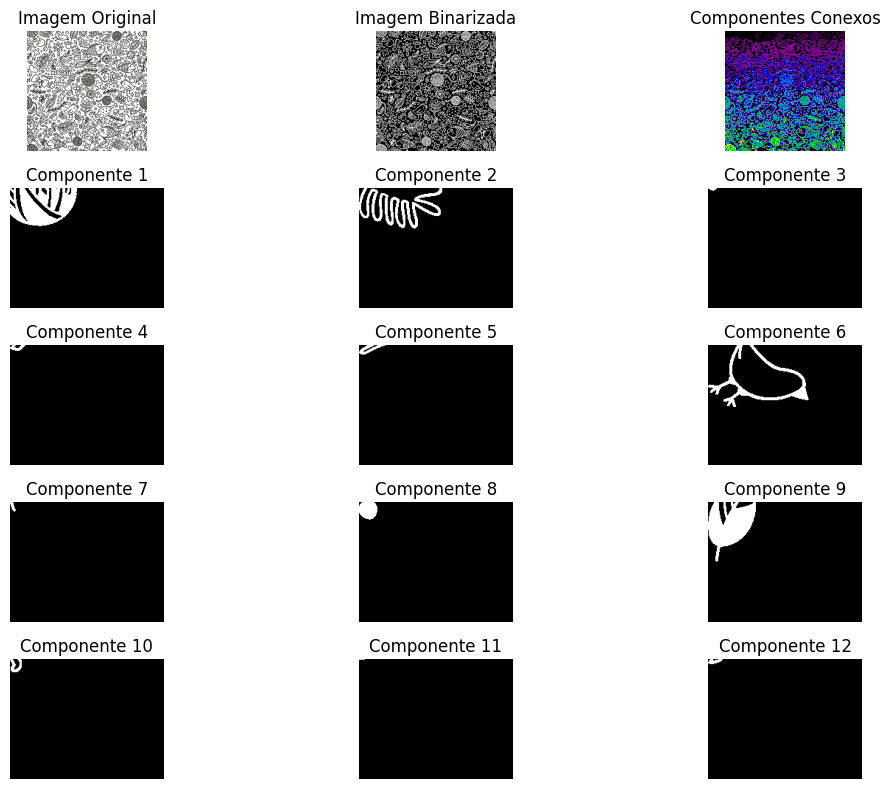

Componente 1:
  Área: 3021.0
  Perímetro: 714.7899346259832
  Compacidade: 13.458487867804083
  Quociente Isoperimétrico: 0.07430255239834475
  Eixo Maior: 97.12339499592403
  Eixo Menor: 54.52380759098151
  Excentricidade: 0.8275534300857834
  Convexidade: 1.328037073816617
  Retangularidade: 0.5704803550784507
  Solidez: 0.7529910269192422

Componente 2:
  Área: 2028.0
  Perímetro: 1113.7665940288703
  Compacidade: 48.67551561165166
  Quociente Isoperimétrico: 0.020544209700382215
  Eixo Maior: 122.77344865422857
  Eixo Menor: 51.75768157948251
  Excentricidade: 0.9067955633640059
  Convexidade: 2.616370808678501
  Retangularidade: 0.31914546758470286
  Solidez: 0.38220882020354313

Componente 3:
  Área: 30.0
  Perímetro: 22.27817459305202
  Compacidade: 1.3165218991482543
  Quociente Isoperimétrico: 0.7595771864083435
  Eixo Maior: 11.18242404159289
  Eixo Menor: 3.771538633650252
  Excentricidade: 0.9414065990861147
  Convexidade: 1.1
  Retangularidade: 0.7113228127392243
  Solidez

In [44]:
# Carregar a imagem
image = io.imread("imagem_1.jpg")

# Binarizar a imagem
# binary_image = binarize_image(image)

# Rotular componentes conexos
labeled_image = label_components(imagem_binaria_1)

# Extrair e padronizar componentes
components = extract_components(labeled_image)

# Preencher buracos
filled_components = fill_holes(components)

# Calcular descritores
descriptors = calculate_descriptors(filled_components)

# Exibir resultados
display_results(image, imagem_binaria_1, labeled_image, filled_components, descriptors)


In [ ]:
import numpy as np
from skimage.measure import label

def contar_componentes_conexos(imagem_binaria):
    # Rotula os componentes conexos na imagem
    labeled_image, num_componentes = label(imagem_binaria, connectivity=1, return_num=True)
    
    return num_componentes, labeled_image

num_componentes, labeled_image = contar_componentes_conexos(imagem_binaria_2)
print(f"Número de componentes conexos: {num_componentes}")
print("Matriz de rótulos:")
print(labeled_image)


Número de componentes conexos: 553
Matriz de rótulos:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
from scipy.ndimage import binary_fill_holes

In [49]:
# Carregar a imagem
imagem_original = io.imread('imagem_1.jpg')

# Converter para escala de cinza
imagem_cinza = color.rgb2gray(imagem_original)

# Binarizar a imagem com Otsu
threshold = threshold_otsu(imagem_cinza)
imagem_binaria = imagem_cinza < threshold

# Preencher as áreas internas (buracos) em cada componente
imagem_preenchida = binary_fill_holes(imagem_binaria)

# Criar a máscara de silhueta (somente contornos)
silhuetas = imagem_preenchida ^ imagem_binaria

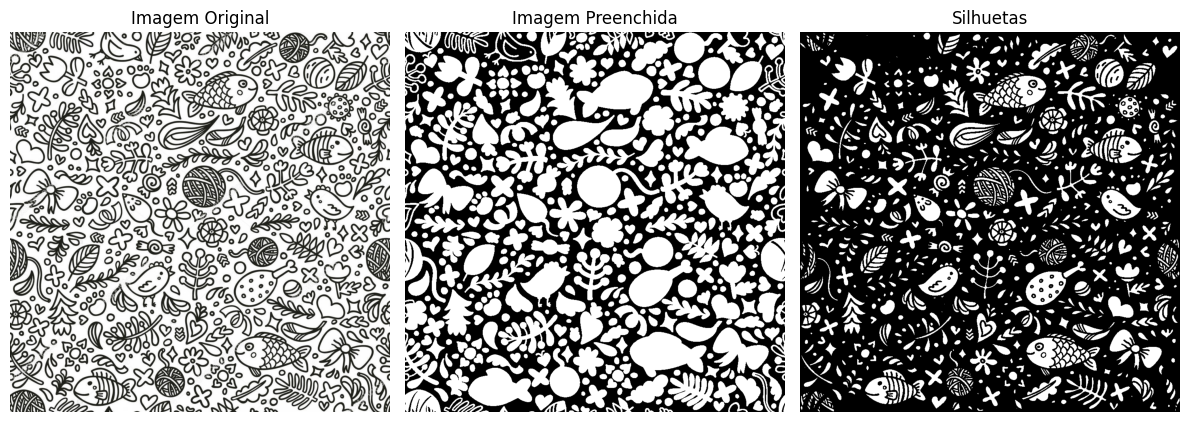

In [50]:
# Mostrar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original, cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagem_preenchida, cmap='gray')
plt.title("Imagem Preenchida")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(silhuetas, cmap='gray')
plt.title("Silhuetas")
plt.axis("off")

plt.tight_layout()
plt.show()


In [55]:
num_componentes, labeled_image = contar_componentes_conexos(imagem_preenchida)
print(f"Número de componentes conexos: {num_componentes}")
print("Matriz de rótulos:")
print(labeled_image)

Número de componentes conexos: 401
Matriz de rótulos:
[[  1   1   0 ...  17  17  17]
 [  1   1   1 ...  17  17  17]
 [  1   1   1 ...  17  17  17]
 ...
 [  0   0   0 ... 391 391 391]
 [  0   0   0 ... 391 391 391]
 [401   0   0 ... 391 391 391]]


In [56]:
num_componentes, labeled_image = contar_componentes_conexos(silhuetas)
print(f"Número de componentes conexos: {num_componentes}")
print("Matriz de rótulos:")
print(labeled_image)

Número de componentes conexos: 1257
Matriz de rótulos:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


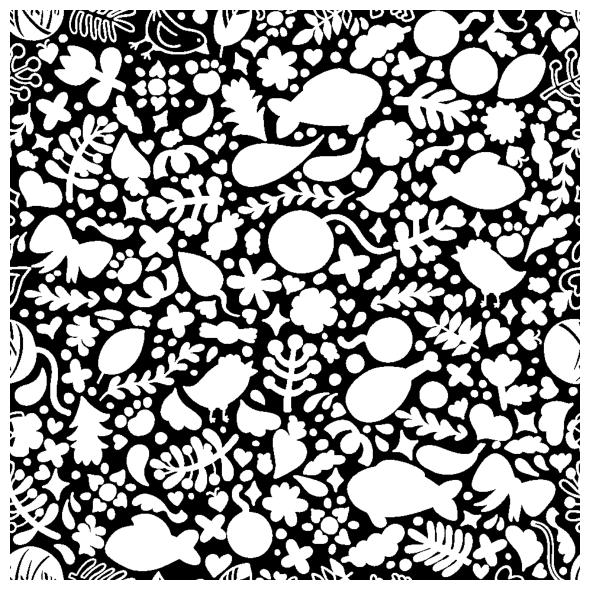

In [52]:
# Mostrar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(imagem_preenchida, cmap='gray')
# plt.title("Imagem Preenchida")
plt.axis("off")

plt.tight_layout()
plt.show()

Inicio

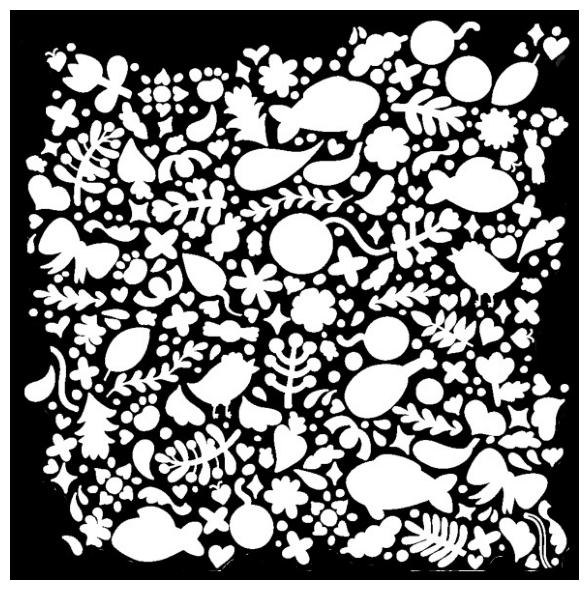

In [54]:
# Carregar a imagem
imagem_original_preenchida = io.imread('imagem_1_2.jpeg')

# Mostrar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(imagem_original_preenchida, cmap='gray')
# plt.title("Imagem Preenchida")
plt.axis("off")

plt.tight_layout()
plt.show()